In [1]:
import pandas as pd
import os

os.environ['OMP_NUM_THREADS'] = '1'

DADOS = '../dados/Mall_Customers_without_CustomerID.csv'

df = pd.read_csv(DADOS)

df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [2]:
# importar as bibliotecas de preparação dos dados
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# criar o objeto de preparação dos dados
preprocessing = ColumnTransformer(
    [
        ('standard', StandardScaler(), ['Age', 'Annual Income (k$)']),
        ('onehot', OneHotEncoder(), ['Gender'])
    ]
)

# processar os dados
preprocessing.fit_transform(df)

# declarar o pipeline
df_scaled = pd.DataFrame(
    preprocessing.transform(df),
    columns = preprocessing.get_feature_names_out()
)

# visualizar os dados
df_scaled.head()

,standard__Age,standard__Annual Income (k$),onehot__Gender_Female,onehot__Gender_Male
0,-1.424569,-1.738999,0.0,1.0
1,-1.281035,-1.738999,0.0,1.0
2,-1.352802,-1.700830,1.0,0.0
3,-1.137502,-1.700830,1.0,0.0
4,-0.563369,-1.662660,1.0,0.0


In [3]:
# chamar o objetivo para observar
preprocessing

ColumnTransformer(transformers=[('standard', StandardScaler(),
                                 ['Age', 'Annual Income (k$)']),
                                ('onehot', OneHotEncoder(), ['Gender'])])

In [4]:
# verificar o nome das colunas de saída
preprocessing.get_feature_names_out()

array(['standard__Age', 'standard__Annual Income (k$)',
       'onehot__Gender_Female', 'onehot__Gender_Male'], dtype=object)

In [5]:
# verificar o nome das colunas de entrada
preprocessing.feature_names_in_

array(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'],
      dtype=object)

In [6]:
# exportar o dataframe com as colunas tratadas
df_scaled.to_csv('../dados/Mall_Customers_without_CustomerID_scaled.csv', index=False)

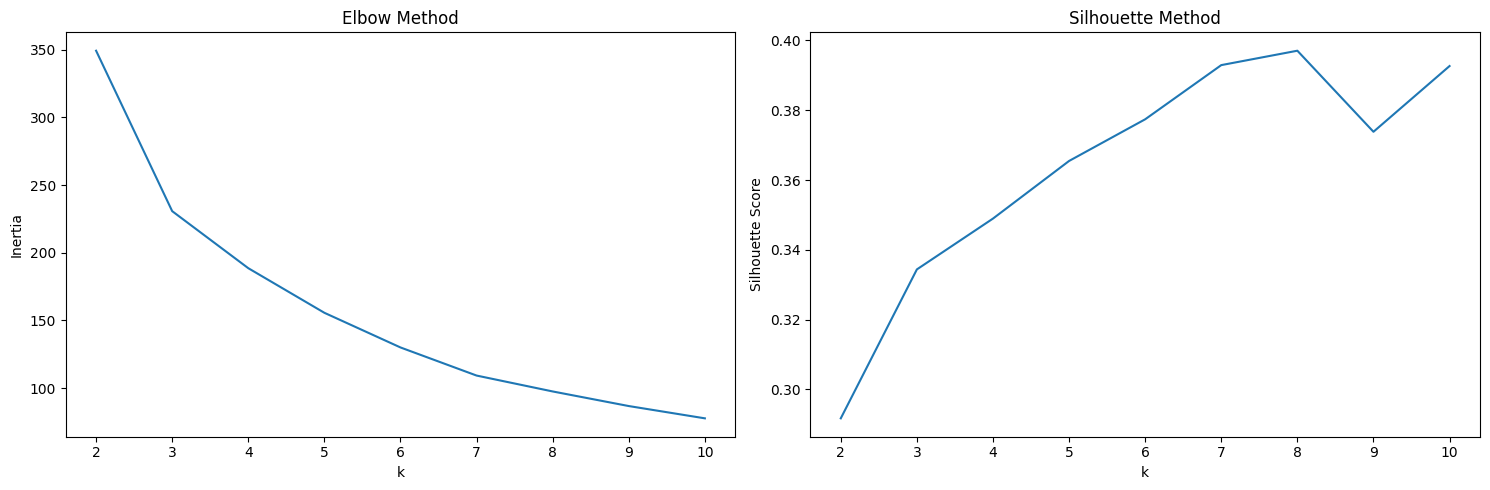

In [7]:
from func_aux import elbow_silhouette_graphs

elbow_silhouette_graphs(X = df_scaled)

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

pipeline = Pipeline(
    [
        ('preprocessing', preprocessing),
        ('clustering', KMeans(n_clusters=5, random_state=42, n_init=10))
    ]
)

pipeline.fit(df)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('standard', StandardScaler(),
                                                  ['Age',
                                                   'Annual Income (k$)']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['Gender'])])),
                ('clustering',
                 KMeans(n_clusters=5, n_init=10, random_state=42))])

In [10]:
pipeline.named_steps

{'preprocessing': ColumnTransformer(transformers=[('standard', StandardScaler(),
                                  ['Age', 'Annual Income (k$)']),
                                 ('onehot', OneHotEncoder(), ['Gender'])]),
 'clustering': KMeans(n_clusters=5, n_init=10, random_state=42)}